In [9]:
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import entropy
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import kstest
import matplotlib.pyplot as plt

In [2]:
whData = pd.read_csv('weight-height.csv')
whData.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
males_h = whData[whData['Gender'] == 'Male']['Height']
females_h = whData[whData['Gender'] == 'Female']['Height']
print(len(males_h))
print(len(females_h))

5000
5000


In [5]:
mcount, mdevision = np.histogram(males_h, bins=100)
fcount, fdevision = np.histogram(females_h, bins=100)

In [6]:
kstest(mcount, fcount)

KstestResult(statistic=0.05, pvalue=0.9996892272702655)

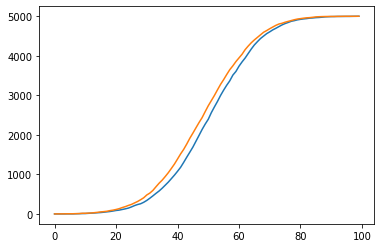

In [12]:
plt.plot(np.cumsum(mcount))
plt.plot(np.cumsum(fcount))

In [44]:
kstest(males_h.sort_values().reset_index(drop=True), females_h.sort_values().reset_index(drop=True), N=1000)

KstestResult(statistic=0.6664, pvalue=0.0)

0       58.406905
1       59.380650
2       59.868078
3       59.938650
4       59.981865
          ...    
4995    78.095867
4996    78.462053
4997    78.528210
4998    78.621374
4999    78.998742
Name: Height, Length: 5000, dtype: float64

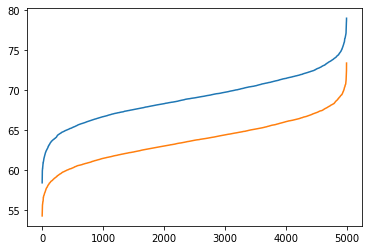

In [41]:
plt.plot((males_h.sort_values().reset_index(drop=True)))
plt.plot((females_h.sort_values().reset_index(drop=True)))

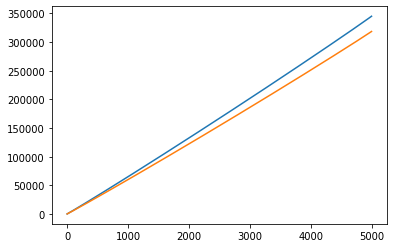

In [42]:
plt.plot(np.cumsum((males_h.sort_values().reset_index(drop=True))))
plt.plot(np.cumsum((females_h.sort_values().reset_index(drop=True))))

(array([  1.,   1.,   0.,   1.,   1.,   1.,   0.,   3.,   2.,   7.,   0.,
          4.,   4.,   8.,   8.,  11.,   7.,   9.,  16.,  12.,  17.,  20.,
         28.,  24.,  30.,  26.,  37.,  37.,  45.,  49.,  71.,  48.,  68.,
         92.,  89.,  77.,  92.,  97., 108., 111., 127., 129., 115., 135.,
        146., 130., 135., 133., 124., 152., 148., 130., 131., 142., 138.,
        120., 129., 123.,  97., 108.,  93.,  93., 116.,  91.,  83.,  72.,
         64.,  65.,  64.,  43.,  47.,  43.,  42.,  34.,  18.,  27.,  21.,
         21.,  21.,  17.,  11.,  11.,   9.,   5.,   9.,  10.,   4.,   3.,
          2.,   1.,   1.,   0.,   1.,   1.,   2.,   0.,   0.,   0.,   0.,
          1.]),
 array([54.26313333, 54.45439785, 54.64566238, 54.8369269 , 55.02819143,
        55.21945595, 55.41072048, 55.601985  , 55.79324953, 55.98451405,
        56.17577858, 56.3670431 , 56.55830763, 56.74957216, 56.94083668,
        57.13210121, 57.32336573, 57.51463026, 57.70589478, 57.89715931,
        58.08842383, 58.27

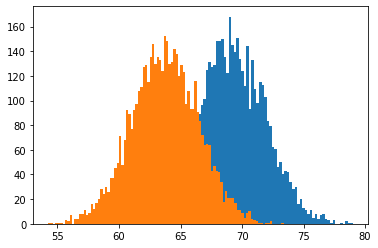

In [34]:
plt.hist((males_h.sort_values()), bins=100)
plt.hist((females_h.sort_values()), bins=100)

In [45]:
males_h.mean()

69.02634590621737

In [46]:
females_h.mean()

63.708773603424916

In [ ]:
nmales_h = males_h - males_h.mean()

In [48]:
nfemales_h = females_h - females_h.mean()

(array([  1.,   1.,   0.,   1.,   1.,   1.,   0.,   3.,   2.,   7.,   0.,
          4.,   4.,   8.,   8.,  11.,   7.,   9.,  16.,  12.,  17.,  20.,
         28.,  24.,  30.,  26.,  37.,  37.,  45.,  49.,  71.,  48.,  68.,
         92.,  89.,  77.,  92.,  97., 108., 111., 127., 129., 115., 135.,
        146., 130., 135., 133., 124., 152., 148., 130., 131., 142., 138.,
        120., 129., 123.,  97., 108.,  93.,  93., 116.,  91.,  83.,  72.,
         64.,  65.,  64.,  43.,  47.,  43.,  42.,  34.,  18.,  27.,  21.,
         21.,  21.,  17.,  11.,  11.,   9.,   5.,   9.,  10.,   4.,   3.,
          2.,   1.,   1.,   0.,   1.,   1.,   2.,   0.,   0.,   0.,   0.,
          1.]),
 array([-9.44564028, -9.25437575, -9.06311123, -8.8718467 , -8.68058218,
        -8.48931765, -8.29805313, -8.1067886 , -7.91552408, -7.72425955,
        -7.53299502, -7.3417305 , -7.15046597, -6.95920145, -6.76793692,
        -6.5766724 , -6.38540787, -6.19414335, -6.00287882, -5.8116143 ,
        -5.62034977, -5.42

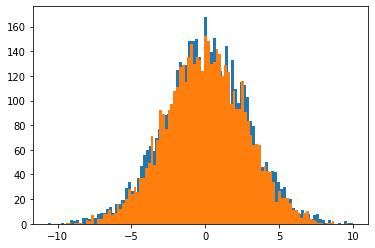

In [49]:
plt.hist((nmales_h.sort_values()), bins=100)
plt.hist((nfemales_h.sort_values()), bins=100)

In [50]:
kstest(nmales_h, nfemales_h)

KstestResult(statistic=0.0194, pvalue=0.3035775745288207)

In [51]:
kstest(nmales_h, 'norm')

KstestResult(statistic=0.23808525858975393, pvalue=7.336270444196898e-250)

In [52]:
nmales_h.mean()

4.689155730375205e-14

In [53]:
nmales_h.std()

2.863362228660651

In [55]:
ideal = norm.rvs(size=len(nmales_h), loc=nmales_h.mean(), scale=nmales_h.std())
ideal

array([-6.40082966, -4.22393532,  2.87535474, ...,  0.97803485,
        6.66163805,  1.19729059])

In [56]:
kstest(nmales_h, ideal)

KstestResult(statistic=0.012, pvalue=0.8643325152980597)